<h5>SVM is a versatile tool for performing linear or nonlinear classification, regression, and even outlier detection.</h5>
<h5>SVMs are particular well suited for classification of complex but small or medium sized datasets</h5>

<h3> Linear SVM Classification </h3>

<ol>
  <li>Large Margin Classification</li>
  <li>Margins are full supported by, instances located on the margin, these are called support vector, so if you add new instances after margin, it won't effect margins because margins are only based on support vectors</li>
</ol>

<h5>SVM is sensitive to feature scaling, so please do feature scaling</h5>

<h3>Soft Margin Classification</h3>

<ol>
<li>The objective is to
find a good balance between keeping the street <b>as large as possible and limiting the
margin violations</b> (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called <b>soft margin classification</b>.
</li>
<li>
    Interesting is <b>C</b> hyper param, smaller <b>C</b> leads to Wider Margin and More Margin Violations
</li>
<li>
    Higher the <b>C</b> values, Narrow margin, Less Margin Violations
</li>
<li>
    If your SVM model is overfitting, then try to regularizing it by reducing <b>C</b>. 
</li>
</ol>

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
iris = load_iris()
iris

In [12]:
print(iris['feature_names'])
#extracting petal length and petal width
X_train, y_train = iris['data'][:,[2,3]], iris['target']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
#Here we are finding whether Iris is Virginica or not
y_train_vir = (y_train == 2)

In [23]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_classifier', LinearSVC(C=0.1, loss='hinge')),
])
svm_clf.fit(X_train, y_train_vir)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_classifier', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [29]:
print(svm_clf.predict(X_train[[100],:]))
print(y_train_vir[100])
print("Awesome both are same...")

[ True]
True
Awesome both are same...


<h5> Unlike Logistic Regression Classifier, SVM Classifiers do not output probabilities</h5>

<b>SVC(kernel='linear', C=1)</b> is same as <b>LinearSVC(C=1)</b>, but SVC is much slower with large datasets

The LinearSVC class <b>regularizes the bias term</b>, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the <b>StandardScaler</b>. Moreover, make sure
you set the <b>loss hyperparameter to "hinge"</b>, as it is not the default
value. Finally, for better performance you should set the dual
hyperparameter to False, unless there are more features than
training instances

<h3>Nonlinear SVM Classification</h3>

For some kind of DataSets after adding Polynomial Features, data might be linearly seperable

In [36]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [38]:
X, y = make_moons()

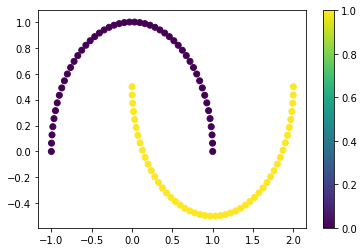

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0], X[:,1],c=y)
plt.colorbar()
plt.show()

In [ ]:
#from above it is clearly non linearly seperable data,

In [51]:
#First Try Linear Classfication
ln_svc_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('lineaSVC', LinearSVC(C=10, loss='hinge'))
])
from sklearn.model_selection import cross_val_score
scores=cross_val_score(ln_svc_clf, X, y, cv = 10)
print(scores)
print(np.mean(scores))
# So we got 80% accuracy, lets try will Polyomial Features

[0.6 0.8 0.9 0.7 1.  1.  1.  0.9 0.9 0.9]
0.8700000000000001


In [53]:
poly_svc_clf = Pipeline([
    ('polynomial',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('linearSVC',LinearSVC(C=10,loss='hinge'))
])
scores = cross_val_score(poly_svc_clf, X, y, cv=10)
print(scores)
print(np.mean(scores))
#See We got 100% Accuracy
#Beautiful

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
